# Importing the Dependencies


## PANDAS -> POWERFUL PYTHON LIBRARY , USED TO PERFORM VARIOUS FUNCTIONS ON DATAFRAMES , AND PLAYS AN IMPORTANT ROLE IN PREPROCESSING . BUILD ON NUMPY AND MATPLOT LIB
## NUMPY-> MAKES ARRAY OPERATIONS EASIER
## SKLEARN -> ROBUST PYTHON LIBRARY , HAS ALL THE CLASSIFICATION , REGRESSION , CLUSTERING ALGORITHMS , TRAINING AND TESTING METHODS . 
## MATPLOTLIB AND SEABORN -> VISUAL REPRESENTATION OF OUR DATA ANALYSIS

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## inorder for the model to work efficiently , dataset must be balanced .

In [8]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [9]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [10]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [11]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [14]:
model = LogisticRegression()

In [15]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [16]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [18]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [19]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


In [20]:
# Lets visualise our LR model accuracy through confusion matrix
cm = confusion_matrix(Y_test,X_test_prediction)
cm

array([[72, 28],
       [12, 93]], dtype=int64)

Text(42.0, 0.5, 'Truth')

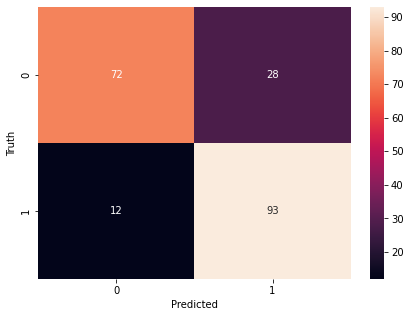

In [21]:
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth') 


# The diagnol values are the correct predictions for truth and false values , however the other values are incorrect predictions which are pretty large for LR

In [22]:

knn = KNeighborsClassifier(n_neighbors = 2)


In [23]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
X_prediction_train = knn.predict(X_train)
training_accuracy = accuracy_score(X_prediction_train, Y_train)

In [25]:
print('Accuracy on Training data : ', training_accuracy)

Accuracy on Training data :  0.9963414634146341


In [26]:
X_pred_test = knn.predict(X_test)
test_acc = accuracy_score(X_pred_test, Y_test)

In [27]:
print('Accuracy on Testing data : ', test_acc)

Accuracy on Testing data :  0.9658536585365853


In [28]:
# Lets visualise our KNN model accuracy through confusion matrix
cm1 = confusion_matrix(Y_test,X_pred_test)
cm1

array([[100,   0],
       [  7,  98]], dtype=int64)

Text(42.0, 0.5, 'Truth')

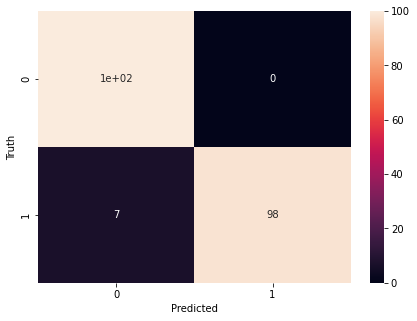

In [29]:
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth') 


# we can clearly see that correct predicitions for KNN is pretty high , with only 7 incorrect predictions , which is pretty accurate
|

## Since K-Nearest Neighbour performed better than Logistic Regression so we ll chose KNN

Building a Predictive System

In [30]:
input_data = [[62,0,0,140,268,0,0,160,0,3.6,0,2,2]]

prediction = knn.predict(input_data)
prediction

array([0], dtype=int64)

In [31]:
import pickle 

In [32]:
pickle.dump(knn,open("Model.pkl","wb"))